<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_09_Data_Preprocessing_volledigjuist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Week 09 - Data preprocessing

In dit labo richten we ons deels op het opschonen van data, met specifieke aandacht voor het omgaan met ontbrekende waarden (missing values). Daarnaast bieden de opdrachten een mooie gelegenheid om de eerder opgedane Python-kennis toe te passen op een grotere dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500)

## <span style="color:deeppink"> Demo's

### Data cleaning

Beschouw de zwangerschapsdiabetes dataset waar een aantal ontbrekende en foutieve waarden aanwezig zijn.
Stap voor stap zal deze dataset worden opgekuist.

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0


#### Aantal ontbrekende waarden opvragen

In [ ]:
# aantal missing values
missing_values_count = dataset.isnull().sum()
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(missing_values_count))

Het aantal ontbrekende waarden in de dataset:
Pregnancies                 3
Glucose                     2
BloodPressure               7
SkinThickness               3
Insulin                     5
BMI                         3
DiabetesPedigreeFunction    3
Age                         0
Outcome                     1
dtype: int64


In [ ]:
# Toon de rijen met ontbrekende waarden
null_data = dataset[dataset.isnull().any(axis=1)]
null_data.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
12,10.0,139.0,NaN,0.0,0.0,27.1,1.441,57,0.0
22,7.0,196.0,90.0,0.0,0.0,NaN,0.451,41,1.0
44,7.0,159.0,64.0,NaN,0.0,27.4,0.294,40,0.0
113,4.0,76.0,NaN,0.0,0.0,34.0,0.391,25,0.0
167,4.0,120.0,NaN,0.0,0.0,29.6,0.709,34,0.0
179,NaN,130.0,82.0,0.0,0.0,39.1,0.956,37,1.0
180,6.0,87.0,80.0,0.0,NaN,23.2,0.084,32,0.0
182,1.0,0.0,74.0,20.0,23.0,27.7,NaN,21,0.0
188,8.0,109.0,76.0,39.0,NaN,27.9,0.640,31,1.0


#### Listwise deletion

Dit betekent dat alle rijen worden verwijderd waar er minstens 1 ontbrekende waarde voorkomt.  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [ ]:
# Listwise deletion: verwijder alle rijen met missing values

dataset_dropna = dataset.dropna(axis=0) # axis=0 -> rijen , axis=1 -> kolommen
print('Het aantal ontbrekende waarden in de dataset:\n'+ str(dataset_dropna.isnull().sum()))
dataset_dropna.head(20)

Het aantal ontbrekende waarden in de dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30,0.0


#### Substitutie van ontbrekende waarden door het gemiddelde

De ontbrekende waarde wordt vervangen door het gemiddelde van alle niet onbrekende waarden in die kolom.

In [ ]:
# Gemiddelde substitutie
gemiddelde = dataset.mean()
median = dataset.median()
print(gemiddelde)

dataset_subst = dataset.fillna(median)
dataset_subst.head(20)

Pregnancies                   3.850980
Glucose                     120.890339
BloodPressure                68.872536
SkinThickness                20.568627
Insulin                      79.943644
BMI                          31.975556
DiabetesPedigreeFunction      0.894133
Age                          33.240885
Outcome                       0.349413
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29,0.0
8,3.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54,1.0


#### Onrealistische/foutieve waarden opsporen en opkuisen

In [ ]:
# Opsporen van onrealistische waarden a.d.h.v. describe
dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,766.000000,761.000000,765.000000,763.000000,765.000000,765.000000,768.000000,767.000000
mean,3.850980,120.890339,68.872536,20.568627,79.943644,31.975556,0.894133,33.240885,0.349413
std,3.372396,31.976274,20.266534,15.937774,115.540000,7.892306,11.665724,11.760232,0.477096
min,0.000000,0.000000,-94.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.375000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.500000,36.500000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,323.000000,81.000000,1.000000


In [ ]:
# IQR
# IQR
Q1 = np.percentile(dataset['DiabetesPedigreeFunction'], 25, method='midpoint')
Q3 = np.percentile(dataset['DiabetesPedigreeFunction'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

nan


In [ ]:
# IQR
# IQR
Q1 = np.percentile(dataset['DiabetesPedigreeFunction'], 25, method='midpoint')
Q3 = np.percentile(dataset['DiabetesPedigreeFunction'], 75, method='midpoint')
IQR

,0
Pregnancies,5.000
Glucose,41.000
BloodPressure,18.000
SkinThickness,32.000
Insulin,128.500
BMI,9.200
DiabetesPedigreeFunction,0.386
Age,17.000
Outcome,1.000


In [ ]:
# prompt: give me upperbound and lowerbound for DiabetesPedigreeFunction

import numpy as np
# Calculate lower and upper bounds using IQR
Q1 = np.percentile(dataset['DiabetesPedigreeFunction'], 25, method='midpoint')
Q3 = np.percentile(dataset['DiabetesPedigreeFunction'], 75, method='midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for DiabetesPedigreeFunction: {lower_bound}")
print(f"Upper bound for DiabetesPedigreeFunction: {upper_bound}")


Lower bound for DiabetesPedigreeFunction: nan
Upper bound for DiabetesPedigreeFunction: nan


In [80]:
# Uitschieters bij de DiabetesPedigreeFunction
sns.boxplot(x=dataset_cleaned['DiabetesPedigreeFunction'])

KeyError: 'DiabetesPedigreeFunction'

In [ ]:
# Verwijderen van uitschieter bij DiabetesPedigreeFunction


In [ ]:
# prompt: Outlier Removal in Dataset using IQR

import matplotlib.pyplot as plt
# Identify outliers based on IQR
outliers = dataset[(dataset['DiabetesPedigreeFunction'] < lower_bound) | (dataset['DiabetesPedigreeFunction'] > upper_bound)]

# Remove outliers
dataset_no_outliers = dataset[(dataset['DiabetesPedigreeFunction'] >= lower_bound) & (dataset['DiabetesPedigreeFunction'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(outliers)}")

# Display the dataset without outliers (optional)
print(dataset_no_outliers.head(20))

# You can further analyze or visualize the data without outliers.
# For example:
# sns.boxplot(x=dataset_no_outliers['DiabetesPedigreeFunction'])
# plt.show()


Number of outliers removed: 0
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [ ]:
# Aantal overblijvende rijen in de dataset

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,766.000000,761.000000,765.000000,763.000000,765.000000,765.000000,768.000000,767.000000
mean,3.850980,120.890339,68.872536,20.568627,79.943644,31.975556,0.894133,33.240885,0.349413
std,3.372396,31.976274,20.266534,15.937774,115.540000,7.892306,11.665724,11.760232,0.477096
min,0.000000,0.000000,-94.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.375000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.500000,36.500000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,323.000000,81.000000,1.000000


### Interpolatie

Bij interpolatie proberen we (in tijdreeksen) de ontbrekende waarden te achterhalen op basis van de aangrenzende waarden.

In [ ]:
dataset = pd.read_csv('temperaturen.csv')
dataset.head(20)

,tijdstip,temperatuur
0,0,7.0
1,1,10.0
2,2,15.0
3,3,NaN
4,4,27.0
5,5,33.0
6,6,29.0
7,7,43.0
8,8,NaN
9,9,NaN


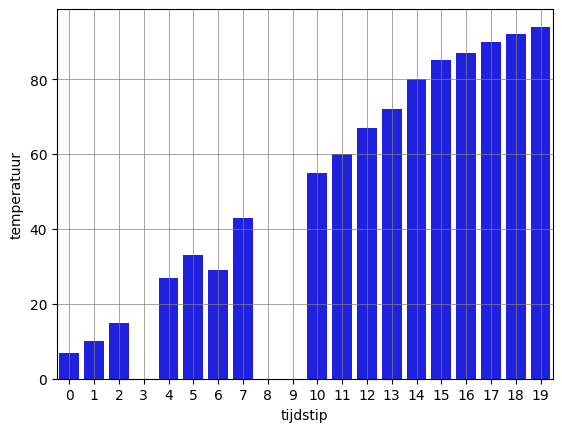

In [ ]:
# interpolatie via dichtste waarde
ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)


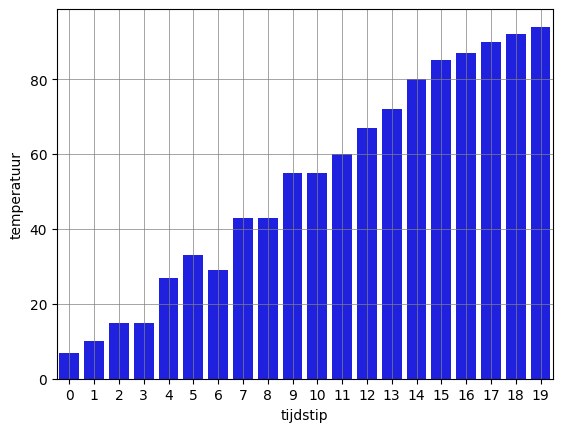

In [ ]:
# interpolatie via lineaire interpolatie waarde
dataset_interpolatie = dataset.interpolate(method ='nearest')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)


In [85]:
# interpolatie via lineaire interpolatie waarde
dataset_interpolatie = dataset.interpolate(method ='linear')

ax = sns.barplot(x='tijdstip', y='temperatuur', data=dataset_interpolatie, color='blue')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

ValueError: Could not interpret value `tijdstip` for `x`. An entry with this name does not appear in `data`.

### Resampling

Resampling = hergroeperen van tijdsdata op een andere tijdsfrequentie (en er iets mee doen, zoals som, gemiddelde, etc.)

In [ ]:
dataset = pd.read_csv('stockprices.csv', parse_dates =['Date'])
dataset.tail(20)

,Date,Open,High,Low,Close,Volume,Name
2999,2017-12-01,69.80,71.25,69.47,70.10,19712943,AABA
3000,2017-12-04,71.06,71.34,68.16,68.31,15533597,AABA
3001,2017-12-05,67.10,69.38,66.62,68.13,11963099,AABA
3002,2017-12-06,67.78,69.62,67.36,69.41,11646582,AABA
3003,2017-12-07,69.75,70.64,69.48,70.22,7084564,AABA
3004,2017-12-08,71.00,71.63,70.82,71.25,7021125,AABA
3005,2017-12-11,71.70,72.09,71.15,71.53,7359312,AABA
3006,2017-12-12,71.07,71.15,69.55,69.77,11296188,AABA
3007,2017-12-13,69.80,71.76,69.69,71.24,17321301,AABA
3008,2017-12-14,70.60,70.62,68.84,69.23,17077065,AABA


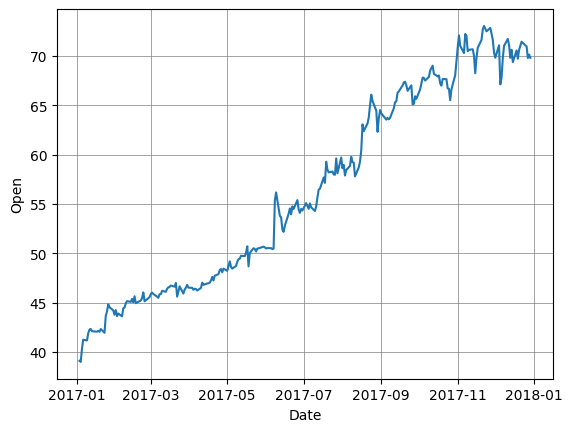

In [ ]:
# Plotten van de openingskoers van 2017
df_2017 = dataset[dataset['Date'].dt.year == 2017]
ax = sns.lineplot(x='Date', y='Open', data=df_2017)
ax.grid(color='gray', linestyle='-', linewidth=0.5)



### **Wat doet deze code?**

Dit stukje code filtert de **openingskoersen** van **2017** uit je dataset en maakt een **lijnplot** met **Seaborn**:

---

### **1. Filteren van Data op Jaar**

```python
df_2017 = dataset[dataset['Date'].dt.year == 2017]
```

* **`dataset['Date'].dt.year`**

  * Neemt de **`Date`** kolom en haalt voor elke rij het **jaar** op.
* **`== 2017`**

  * Selecteert alleen de rijen waar het jaar **2017** is.
* **Resultaat:**

  * Je krijgt een **sub-dataset** met alleen de **gegevens van 2017**.

---

#### **Voorbeeld Data voor Filtering**

Als je dataset er zo uitziet:

| Date       | Open |
| ---------- | ---- |
| 2016-12-31 | 120  |
| 2017-01-01 | 125  |
| 2017-02-01 | 130  |
| 2017-03-01 | 135  |
| 2018-01-01 | 140  |

Dan wordt dit:

| Date       | Open |
| ---------- | ---- |
| 2017-01-01 | 125  |
| 2017-02-01 | 130  |
| 2017-03-01 | 135  |

---

### **2. Lijnplot Maken**

```python
ax = sns.lineplot(x='Date', y='Open', data=df_2017)
```

* **`sns.lineplot()`**

  * Maakt een **lijnplot** met **`Date`** op de **x-as** en **`Open`** op de **y-as**.
* **`data=df_2017`**

  * Gebruikt de gefilterde **2017** dataset.
* **Resultaat:**

  * Je krijgt een **lijnplot** van de **openingskoersen** over **2017**.

---

### **3. Raster Toevoegen voor Leesbaarheid**

```python
ax.grid(color='gray', linestyle='-', linewidth=0.5)
```

* **`ax.grid()`**

  * Voegt een **grid** toe voor betere leesbaarheid van je grafiek.
* **Parameters:**

  * **`color='gray'`**: De kleur van de gridlijnen.
  * **`linestyle='-'`**: Vaste lijnen voor het raster.
  * **`linewidth=0.5`**: Dikte van de lijnen.

---

### **4. Verwachte Resultaat**

Je krijgt een lijnplot zoals:

* **X-as:** **`Date`** (alle dagen in 2017)
* **Y-as:** **`Open`** (openingskoers van die dagen)
* **Grid:** Grijze rasterlijnen voor betere leesbaarheid

---

### **Mogelijke Verbeteringen**

* **Titels en Labels:**

  * Voeg een **titel** en **as-labels** toe voor een nettere presentatie:

    ```python
    ax.set_title('Openingskoersen van 2017')
    ax.set_xlabel('Datum')
    ax.set_ylabel('Openingskoers')
    ```

* **Rotatie van Datum Labels:**

  * Zorg ervoor dat de datumlabels **leesbaar** zijn:

    ```python
    plt.xticks(rotation=45)
    ```

* **Kleuren:**

  * Gebruik een **kleurenschema** voor een aantrekkelijkere visualisatie:

    ```python
    sns.lineplot(x='Date', y='Open', data=df_2017, color='green')
    ```

---

### **Waarom deze Benadering?**

* **Efficiëntie:**

  * Dit is een snelle manier om **jaar-gefilterde** tijdreeksen te visualiseren.
* **Flexibiliteit:**

  * Je kunt dit gemakkelijk aanpassen voor **andere jaren** of **andere kolommen**.
* **Consistentie:**

  * Werkt goed met de **datetime** functionaliteit van **pandas**.

---

Wil je dat ik je laat zien hoe je dit kunt uitbreiden met **bewegende gemiddelden** of **smoothing** voor een nog duidelijker overzicht? 😊


### One hot encoding

One hot encoding is een techniek om categorische data (zoals tekstlabels) om te zetten naar numerieke waarden zodat je ze kunt gebruiken in machine learning modellen.

In [ ]:
raw_data = {'food_name': ['Apple', 'Chicken', 'Broccoli', 'Chocolat'],'Calories': [95, 231, 50, 549]}
dataset = pd.DataFrame(raw_data)
dataset.head()

,food_name,Calories
0,Apple,95
1,Chicken,231
2,Broccoli,50
3,Chocolat,549


In [ ]:
# One-hot encoding
dataset = pd.concat([dataset,pd.get_dummies(dataset['food_name'], prefix='food')],axis=1)
dataset.drop(['food_name'],axis=1, inplace=True)
dataset.head()

,Calories,food_Apple,food_Broccoli,food_Chicken,food_Chocolat
0,95,True,False,False,False
1,231,False,False,True,False
2,50,False,True,False,False
3,549,False,False,False,True


In [ ]:
dataset.drop(['food_Apple'],axis=1,inplace=True)
dataset.head()

,Calories,food_Broccoli,food_Chicken,food_Chocolat
0,95,False,False,False
1,231,False,True,False
2,50,True,False,False
3,549,False,False,True


## <span style="color:deeppink">  Opdracht - Deel 1: IMDB

De dataset IMDB.csv bevat gegevens van 1000 films en hun IMDB score.

We beginnen eerst met het cleanen van de dataset door inconsistente data te verwijderen of op te vullen. Daarna wordt de data gevisualieerd of wordt de gevraagde informatie uit de dataset gepuurd.

In [2]:
dataset = pd.read_csv('IMDB.csv')
dataset.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Unnamed: 11,Unnamed: 12
0,1,Guardians of the Galaxy,NaN,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,NaN,1000.0
1,2,Prometheus,"Adventure,Mystery",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,NaN,872.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,NaN,NaN
3,4,Sing,"Animation,Comedy",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,NaN,NaN
4,5,Suicide Squad,"Action,Adventure",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,NaN,NaN


In [3]:
# Dimensie van de dataset
print(dataset.shape)

(1000, 13)


### Verwijderen of opvullen van missing values

Bepaal het aantal missing values in elke kolom van de dataset.

In [4]:
#  Bepalen van het aantal missing values
missing_values = dataset.isnull().sum()
print(missing_values)


Rank              0
Title             0
Genre            54
Director          0
Actors            0
Year              0
Runtime           0
Rating            0
Votes             0
Revenue         128
Metascore        64
Unnamed: 11    1000
Unnamed: 12     998
dtype: int64


Verwijder alle kolommen die meer dan

*   List item
*   List item

129 waarden bevat

In [6]:
dataset_clean = dataset.dropna(thresh=129, axis=1)
dataset_clean.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,NaN,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
# prompt: Verwijder alle kolommen die meer dan
# List item
# List item
# 129 waarden bevat

# existing code ...

# Verwijder alle kolommen die meer dan 129 waarden bevatten (dit lijkt een foute eis)
# Een kolom kan nooit meer waarden bevatten dan het aantal rijen in de dataset.
# Waarschijnlijk bedoelt men: Verwijder kolommen met meer dan 129 *ontbrekende* waarden.
threshold = 129
dataset_cleaned = dataset.dropna(thresh=len(dataset) - threshold, axis=1)
dataset_cleaned.head()


,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,NaN,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Verwijder alle rijen uit de dataset waarbij zowel de genre, metascore en revenue niet gekend is. Verwijderen van rijen op basis van ontbrekende waarden in kolommen kan via dataset.dropna(subset=...)

Bijvoorbeeld verwijderen van alle rijen met ontbrekende waarden in 2 verschillende kolommen:

`dataset_dropna = dataset.dropna(subset = ['kolomnaam1', 'kolomnaam2'])`

In [7]:
# Verwijder alle rijen uit de dataset waarbij de zowel het genre, de metascore en de revenue niet gekend zijn
dataset_cleaned = dataset.dropna(subset = ['Genre', 'Metascore', 'Revenue'])
dataset_cleaned.head()


,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Unnamed: 11,Unnamed: 12
1,2,Prometheus,"Adventure,Mystery",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,NaN,872.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,NaN,NaN
3,4,Sing,"Animation,Comedy",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,NaN,NaN
4,5,Suicide Squad,"Action,Adventure",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,NaN,NaN
5,6,The Great Wall,"Action,Adventure",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,NaN,NaN


Er is een feature (kolom) aanwezig in de dataset waar het niet logisch is om de ontbrekende waarden op te vullen met de mediaan/gemiddelde. Welke feature is dit? Verwijder alle rijen waar de waarde ontbreekt uit deze kolom.

In [8]:
dataset_cleaned = dataset.dropna(subset = ['Unnamed: 11'])
dataset_cleaned.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Unnamed: 11,Unnamed: 12


Vervang de ontbrekende waarden in de kolommen Revenue en Metascore door het gemiddelde van die kolommen.
Je kan dit via `dataset=dataset.fillna({'kolomnaam1':gemiddelde_kolom1,'kolomnaam2':gemiddelde_kolom2})`

In [9]:
# gemiddelde revenue en metascore:
gemiddelde_revenue = dataset['Revenue'].mean()
gemiddelde_metascore = dataset['Metascore'].mean()


In [10]:
# Vervang de ontbrekende waarden in de kolommen Revenue en Metascore door het gemiddelde van die kolommen.
dataset_cleaned = dataset.fillna({'Revenue':gemiddelde_revenue,'Metascore':gemiddelde_metascore})
dataset_cleaned.head()


,Rank,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Unnamed: 11,Unnamed: 12
0,1,Guardians of the Galaxy,NaN,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,NaN,1000.0
1,2,Prometheus,"Adventure,Mystery",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,NaN,872.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,NaN,NaN
3,4,Sing,"Animation,Comedy",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,NaN,NaN
4,5,Suicide Squad,"Action,Adventure",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,NaN,NaN


### Visualaties en analyse

Gebruik de Seaborn countplot om het aantal films per jaar te visualiseren. Gebruik het jaartal op de x-as en het aantal films op de y-as.

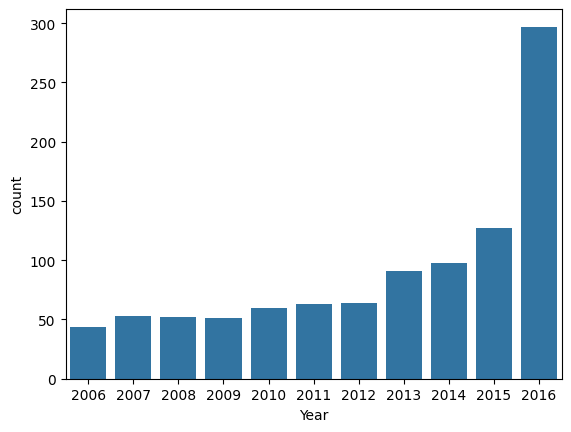

In [11]:
# Grafiek van het aantal films per jaar.
sns.countplot(x='Year', data=dataset)
plt.show()

Gebruik de Seaborn countplot om de distributie van de ratings in kaart te brengen.
Sorteer de countplot van de meest gegeven rating naar de minst gegeven rating. Het sorteren kan in de countplot via de property `order=dataset['kolomnaam'].value_counts().index`

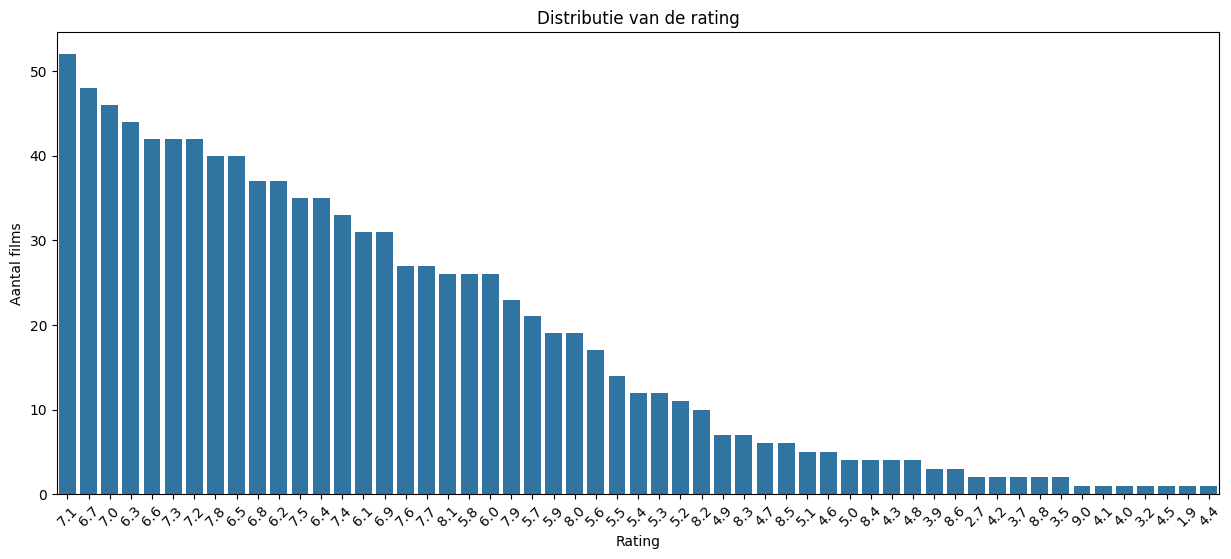

In [13]:
# Distributie van de Rating. Sorteer de countplot van meest gegeven rating naar de minst gegeven rating
plt.figure(figsize = (15,6))
sns.countplot(data=dataset_clean, x='Rating',order=dataset_clean.Rating.value_counts().index)
plt.title('Distributie van de rating')
plt.xlabel('Rating')
plt.ylabel('Aantal films')
plt.xticks(rotation=45)
plt.show()





Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen. Sorteer de countplot van meest voorkomende doelen naar minst voorkomende doelen.

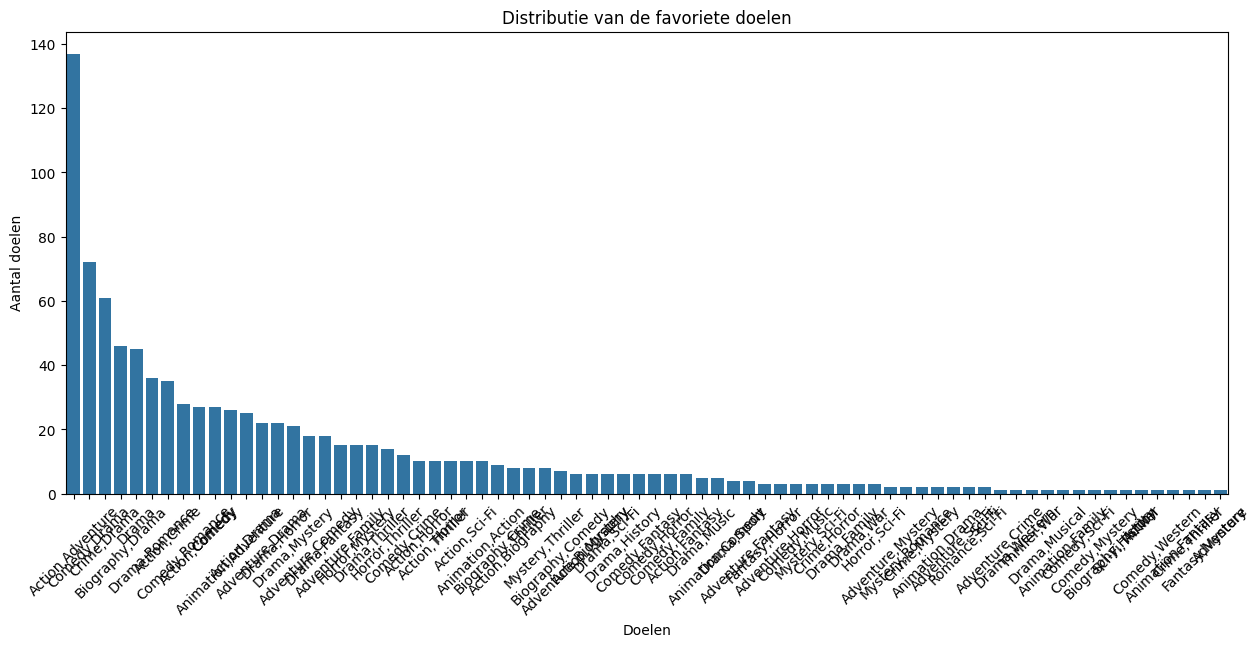

In [14]:
# Gebruik de Seaborn countplot om de distributie van de favoriete doelen ('Target_type') in kaart te brengen.
# Sorteer de countplot van meest voorkomende naar minst voorkomende.
plt.figure(figsize = (15,6))
sns.countplot(data=dataset_clean, x='Genre',order=dataset_clean.Genre.value_counts().index)
plt.title('Distributie van de favoriete doelen')
plt.xlabel('Doelen')
plt.ylabel('Aantal doelen')
plt.xticks(rotation=45)
plt.show()


Welk genre komt het meest voor in de dataset?

Bepaal welke director het meest films heeft geregiseerd.

In [15]:
# Bepaal welke director het meest films heeft geregiseerd.
meestefilmsdirector = dataset['Director'].value_counts().idxmax()
print(meestefilmsdirector)


Ridley Scott


Welk genre kende de hoogste maximale revenue en welk genre het laagst?  Groepeer eerst per genre via `dataset.groupby(['Genre']).max()`

In [16]:
# Welk genre heeft de hoogste maximale revenue?
dataset.groupby(['Genre']).max()

# Welk genre heeft de laagste maximale revenue?
dataset.groupby(['Genre']).min()



,Rank,Title,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Unnamed: 11,Unnamed: 12
Genre,,,,,,,,,,,,
Action,581,Kickboxer: Vengeance,John Stockwell,"Dave Bautista, Alain Moussi, Gina Carano, Jean...",2016,90,4.9,6809,131.56,37.0,NaN,NaN
"Action,Adventure",5,2012,Alan Taylor,"Aaron Taylor-Johnson, Elizabeth Olsen, Bryan C...",2006,85,2.7,1391,0.05,20.0,NaN,NaN
"Action,Biography",118,American Sniper,Clint Eastwood,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2008,92,3.9,552,0.10,60.0,NaN,NaN
"Action,Comedy",15,21 Jump Street,Adam McKay,"Aaron Taylor-Johnson, Chloë Grace Moretz,Chris...",2006,90,5.3,6946,1.80,27.0,NaN,NaN
"Action,Crime",54,Bastille Day,Antoine Fuqua,"Aaron Paul, Dominic Cooper, Imogen Poots, Scot...",2006,88,4.5,223,0.04,28.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
"Romance,Sci-Fi",113,The Adjustment Bureau,Ana Lily Amirpour,"Keanu Reeves, Jason Momoa, Jim Carrey, Diego Luna",2011,106,6.1,512,62.45,65.0,NaN,NaN
Sci-Fi,184,2307: Winter's Dream,Joey Curtis,"Paul Sidhu, Branden Coles, Arielle Holmes, Kel...",2016,101,4.0,277,20.76,53.0,NaN,NaN
"Sci-Fi,Thriller",513,The Happening,M. Night Shyamalan,"Mark Wahlberg, Zooey Deschanel, John Leguizamo...",2008,91,5.0,170897,64.51,34.0,NaN,NaN


## <span style="color:deeppink">  Opdracht deel 2 - Vision 42

Deze dataset komt uit een project voor het bedrijf vision 42. Deze dataset bestaat uit waarden afkomstig van 2 sensoren, die hun positie in de x  en z richting opmeten.

In [17]:
dataset = pd.read_csv('Vision42.csv')
dataset.head(10)

,N16_z,N17_z,N16_y,N17_y,N16_x,N17_x,date
0,0.0,0.0,0.0,0.0,0.0,0.0,2015-11-11 23:00:00
1,1.5,0.9,-2.8,-2.5,-0.1,1.0,2015-11-12 16:18:40
2,1.0,0.7,-3.4,-2.9,0.5,1.3,2015-11-12 18:21:50
3,1.0,0.2,-3.0,-2.6,0.0,1.0,2015-11-12 19:37:44
4,2.0,NaN,-3.8,NaN,0.5,NaN,2015-11-12 20:55:26
5,1.4,1.2,-3.7,-3.3,0.3,1.2,2015-11-12 21:35:32
6,1.1,0.2,-4.0,-3.4,0.3,1.4,2015-11-12 22:53:29
7,0.8,0.4,-3.1,-2.9,0.2,1.2,2015-11-13 00:19:02
8,0.5,1.3,-3.8,-3.4,-0.1,0.9,2015-11-13 01:37:05
9,2.8,1.1,-4.3,-3.7,-0.1,1.2,2015-11-13 02:36:47


In [18]:
dataset.shape

(4044, 7)

Bevat deze dataset ontbrekende waarden?

In [19]:
dataset.isnull().sum()

,0
N16_z,451
N17_z,198
N16_y,451
N17_y,198
N16_x,451
N17_x,198
date,0


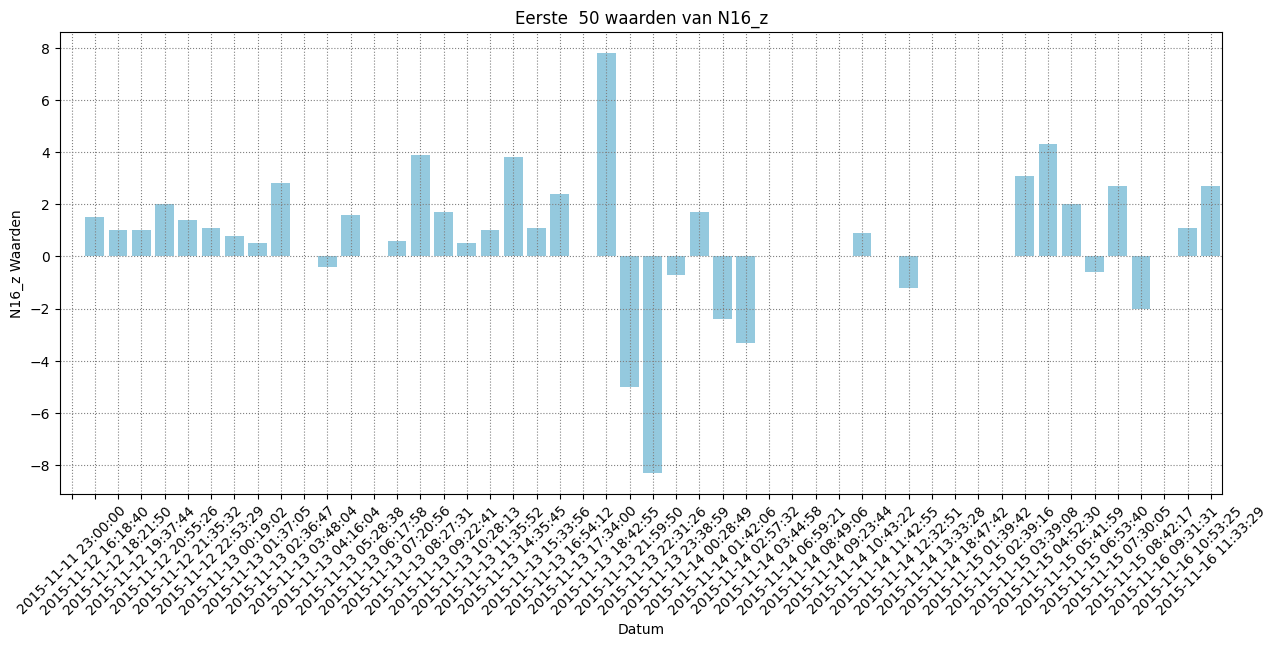

In [20]:
dataset.date = pd.to_datetime(dataset.date) #Converting time to datetime format
dataset_50 = dataset.head(50) #Getting first 50 values

plt.figure(figsize = (15, 6))
sns.barplot(x = dataset_50['date'], y = dataset_50['N16_z'], data = dataset_50, color='skyblue')
plt.xticks(rotation=45)
plt.title("Eerste  50 waarden van N16_z")
plt.xlabel("Datum")
plt.grid(color = 'gray', linestyle = 'dotted')
plt.ylabel("N16_z Waarden")
plt.show()

Er zijn hier toch heel wat ontbrekende waarden, maar aangezien dit een tijdsreeks is mag je de data niet zomaar verwijderen.   
plot de eerste 50 waarden van de dataset in een barplot waar de x-waarde de datum is en de y-waarde de kolom N16_z

<Axes: xlabel='date', ylabel='N16_z'>

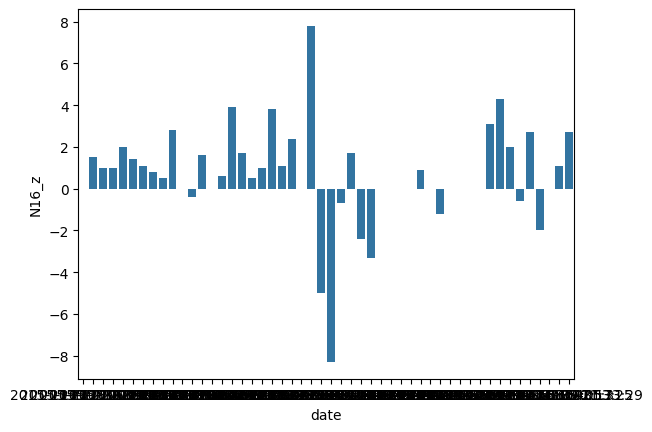

In [ ]:
 sns.barplot(x='date', y='N16_z', data=dataset.head(50))

Gebruik lineare interpolatie om dataset aan te vullen (best de dataset opslaan in een andere dataframe). Plot hierna opnieuw de eerste 50 datapunten in een barplot

In [21]:
dataset_50_completed = dataset_50.interpolate(method='linear', limit_direction = 'forward')


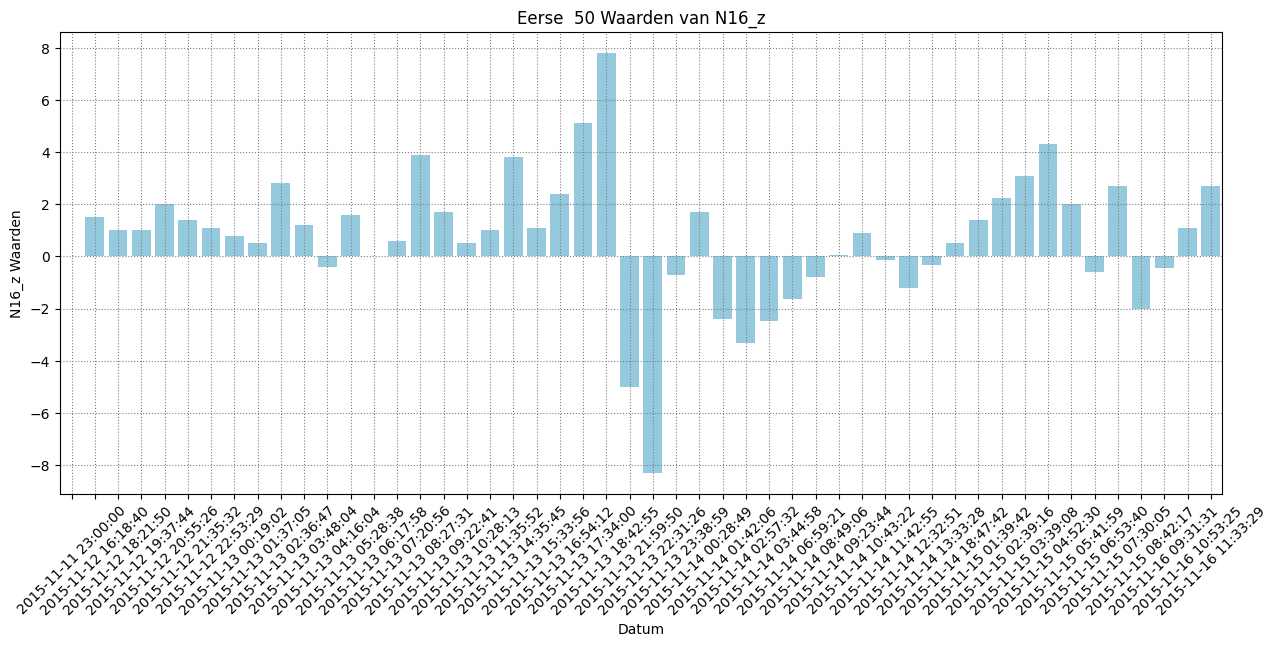

In [22]:
plt.figure(figsize = (15, 6))
sns.barplot(x = dataset_50_completed['date'], y = dataset_50_completed['N16_z'], data = dataset_50_completed, color='skyblue')
plt.title("Eerse  50 Waarden van N16_z")
plt.xlabel("Datum")
plt.xticks(rotation=45)
plt.ylabel("N16_z Waarden")
plt.grid(color = 'gray', linestyle = 'dotted')
plt.show()

Vul de dataset nu opnieuw aan maar met de dichtste waarde. Plot opnieuw de eerste 50 waarden.

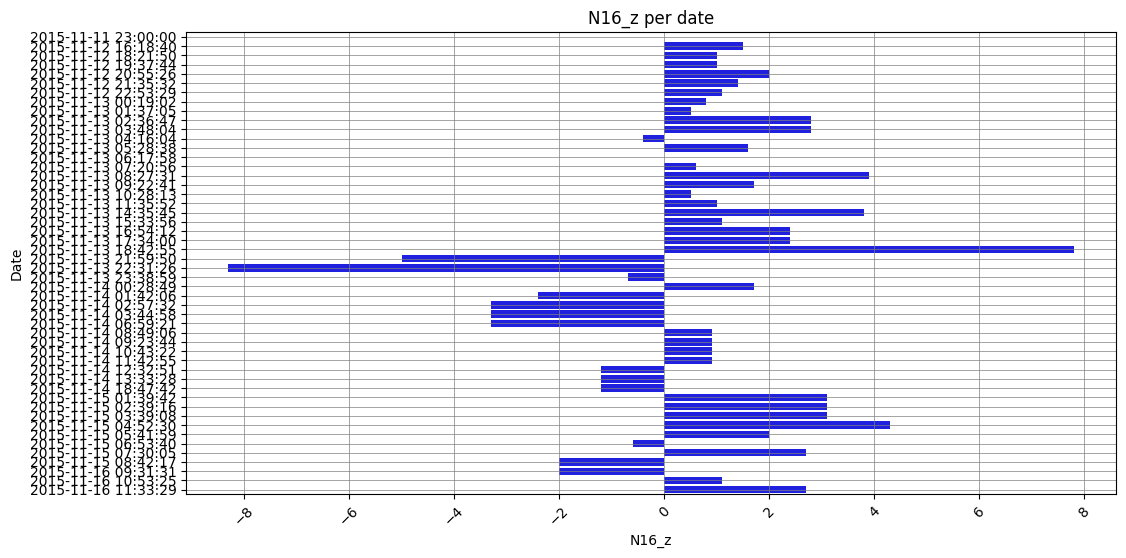

In [43]:
# Verwijder de datetime kolom tijdelijk
dataset_numeric = dataset_50.drop(columns=['date'])

# Interpoleer alleen de numerieke kolommen
dataset_50_completed = dataset_numeric.interpolate(method='nearest')

# Voeg de tijdstippen terug toe
dataset_50_completed['date'] = dataset_50['date']

# Plotten met de juiste dataset
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='N16_z', y='date', data=dataset_50_completed, color='blue')
ax.set_title('N16_z per date')
ax.set_xlabel('N16_z')
ax.set_ylabel('Date')
ax.grid(color='gray', linestyle='-', linewidth=0.5)

plt.xticks(rotation=45)  # Zorg ervoor dat tijdstippen leesbaar zijn
plt.show()


## <span style="color:deeppink">  Opdracht deel 3 - One-hot encoding

<img src="Star Wars.jpg">
Deze dataset bestaat uit de mening van personen over een bepaald karakter in Star Wars. Deze dataset wordt gebruikt om de voorspellen of een persoon fan is van Star Wars of niet. Deze dataset heeft echter nog heel wat preprocessing stappen nodig voordat het gebruikt kan worden om voorspellingen te gaan doen. Een deel van de preprocessing stappen moeten jullie zelf doen, voor een ander deel is er sample code voorzien. Daarna is er ook wat code voorzien waar er Machine learning op wordt toegepast (Just for fun :D )

In [28]:
dataset = pd.read_csv('StarWars.csv')
dataset.head()

,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Gender,Age,Education,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,Location,StarWars fan
0,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,I don't understand this question,No,No,Man,18-29,High school degree,Yes,Yes,Yes,No,No,No,South Atlantic,No
1,Yes,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,No,Man,18-29,Some college or Associate degree,Yes,Yes,Yes,Yes,Yes,Yes,South Atlantic,Yes
2,Yes,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Man,18-29,Bachelor degree,Yes,Yes,Yes,Yes,Yes,Yes,West South Central,Yes
3,Yes,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Han,No,No,Man,18-29,High school degree,Yes,Yes,Yes,Yes,Yes,Yes,West North Central,Yes
4,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,I don't understand this question,No,No,Man,18-29,Some college or Associate degree,No,Yes,No,No,No,No,Middle Atlantic,No


Zijn er ontbrekende waarden in deze dataset?

In [29]:
dataset.isnull().sum()

,0
Have you seen any of the 6 films in the Star Wars franchise?,0
Please rank The Phantom Menace,0
Please rank attack of the clones,0
Please rank Revenge of the Sith,0
Plesase rank a new hope,0
Please rank The Empire Strikes Back,0
Please rank Return of the Jedi,0
Han Solo,0
Luke Skywalker,0
Princess Leia Organa,0


Een AI model kan enkel om met numerieke waarden, dus geen strings, daarom worden alle yes en no in de dataset verandert naar 0 en 1.
vervang alle 'Yes'  naar 1 en alle 'No' naar 0. Dit kan via de methode:  
`dataset = dataset.replace({'te_vervangen_waarde1':naar_deze_waarde1, 'te_vervangen_waarde2':naar_deze_waarde2})`

In [30]:
dataset = dataset.replace({'Yes':1, 'No':0})
dataset.head()

<ipython-input-30-9da144ce8ea2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'Yes':1, 'No':0})


,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Gender,Age,Education,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,Location,StarWars fan
0,1,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,I don't understand this question,0,0,Man,18-29,High school degree,1,1,1,0,0,0,South Atlantic,0
1,1,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,0,0,Man,18-29,Some college or Associate degree,1,1,1,1,1,1,South Atlantic,1
2,1,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,1,0,Man,18-29,Bachelor degree,1,1,1,1,1,1,West South Central,1
3,1,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Somewhat favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat unfavorably,Very favorably,Han,0,0,Man,18-29,High school degree,1,1,1,1,1,1,West North Central,1
4,1,1.0,2.0,3.0,4.0,5.0,6.0,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,Somewhat unfavorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Somewhat unfavorably,Very favorably,I don't understand this question,0,0,Man,18-29,Some college or Associate degree,0,1,0,0,0,0,Middle Atlantic,0


De volgende kolommen moeten omgezet worden met one_hot_encoding:
['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?', 'Age', 'Education', 'Location']

In [31]:
# prompt: De volgende kolommen moeten omgezet worden met one_hot_encoding: ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?', 'Age', 'Education', 'Location']

import pandas as pd
columns_to_encode = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
 'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda', 'Which character shot first?', 'Age', 'Education', 'Location']

dataset = pd.concat([dataset, pd.get_dummies(dataset[columns_to_encode], prefix=columns_to_encode)], axis=1)
dataset = dataset.drop(columns=columns_to_encode)
dataset.head()


,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Gender,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,StarWars fan,Han Solo_Neither favorably nor unfavorably (neutral),Han Solo_Somewhat favorably,Han Solo_Somewhat unfavorably,Han Solo_Unfamiliar,Han Solo_Very favorably,Luke Skywalker_Neither favorably nor unfavorably (neutral),Luke Skywalker_Somewhat favorably,Luke Skywalker_Somewhat unfavorably,Luke Skywalker_Unfamiliar,Luke Skywalker_Very favorably,Luke Skywalker_Very unfavorably,Princess Leia Organa_Neither favorably nor unfavorably (neutral),Princess Leia Organa_Somewhat favorably,Princess Leia Organa_Somewhat unfavorably,Princess Leia Organa_Unfamiliar,Princess Leia Organa_Very favorably,Princess Leia Organa_Very unfavorably,Anakin Skywalker_Neither favorably nor unfavorably (neutral),Anakin Skywalker_Somewhat favorably,Anakin Skywalker_Somewhat unfavorably,Anakin Skywalker_Unfamiliar,Anakin Skywalker_Very favorably,Anakin Skywalker_Very unfavorably,Obi Wan Kenobi_Neither favorably nor unfavorably (neutral),Obi Wan Kenobi_Somewhat favorably,Obi Wan Kenobi_Somewhat unfavorably,Obi Wan Kenobi_Unfamiliar,Obi Wan Kenobi_Very favorably,Obi Wan Kenobi_Very unfavorably,Emperor Palpatine_Neither favorably nor unfavorably (neutral),Emperor Palpatine_Somewhat favorably,Emperor Palpatine_Somewhat unfavorably,Emperor Palpatine_Unfamiliar,Emperor Palpatine_Very favorably,Emperor Palpatine_Very unfavorably,Darth Vader_Neither favorably nor unfavorably (neutral),Darth Vader_Somewhat favorably,Darth Vader_Somewhat unfavorably,Darth Vader_Unfamiliar,Darth Vader_Very favorably,Darth Vader_Very unfavorably,Lando Calrissian_Neither favorably nor unfavorably (neutral),Lando Calrissian_Somewhat favorably,Lando Calrissian_Somewhat unfavorably,Lando Calrissian_Unfamiliar,Lando Calrissian_Very favorably,Lando Calrissian_Very unfavorably,Boba Fett_Neither favorably nor unfavorably (neutral),Boba Fett_Somewhat favorably,Boba Fett_Somewhat unfavorably,Boba Fett_Unfamiliar,Boba Fett_Very favorably,Boba Fett_Very unfavorably,C-3P0_Neither favorably nor unfavorably (neutral),C-3P0_Somewhat favorably,C-3P0_Somewhat unfavorably,C-3P0_Unfamiliar,C-3P0_Very favorably,C-3P0_Very unfavorably,R2 D2_Neither favorably nor unfavorably (neutral),R2 D2_Somewhat favorably,R2 D2_Somewhat unfavorably,R2 D2_Unfamiliar,R2 D2_Very favorably,R2 D2_Very unfavorably,Jar Jar Binks_Neither favorably nor unfavorably (neutral),Jar Jar Binks_Somewhat favorably,Jar Jar Binks_Somewhat unfavorably,Jar Jar Binks_Unfamiliar,Jar Jar Binks_Very favorably,Jar Jar Binks_Very unfavorably,Padme Amidala_Neither favorably nor unfavorably (neutral),Padme Amidala_Somewhat favorably,Padme Amidala_Somewhat unfavorably,Padme Amidala_Unfamiliar,Padme Amidala_Very favorably,Padme Amidala_Very unfavorably,Yoda_Neither favorably nor unfavorably (neutral),Yoda_Somewhat favorably,Yoda_Somewhat unfavorably,Yoda_Unfamiliar,Yoda_Very favorably,Yoda_Very unfavorably,Which character shot first?_Greedo,Which character shot first?_Han,Which character shot first?_I don't understand this question,Age_18-29,Age_30-44,Age_45-60,Age_60<,Education_Bachelor degree,Education_Graduate degree,Education_High school degree,Education_Less than high school degree,Education_Some college or Associate degree,Location_East North Central,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,1,1.0,2.0,3.0,4.0,5.0,6.0,0,0,Man,1,1,1,0,0,0,0,False,True,False,False,False,False,True,False,False,False,False,F

De kolom gender mag verwijderd worden, enig idee waarom?

In [ ]:
# Waarom?

In [32]:
# Kolom verwijderen:
dataset = dataset.drop(columns=['Gender'])
dataset.head()

,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,StarWars fan,Han Solo_Neither favorably nor unfavorably (neutral),Han Solo_Somewhat favorably,Han Solo_Somewhat unfavorably,Han Solo_Unfamiliar,Han Solo_Very favorably,Luke Skywalker_Neither favorably nor unfavorably (neutral),Luke Skywalker_Somewhat favorably,Luke Skywalker_Somewhat unfavorably,Luke Skywalker_Unfamiliar,Luke Skywalker_Very favorably,Luke Skywalker_Very unfavorably,Princess Leia Organa_Neither favorably nor unfavorably (neutral),Princess Leia Organa_Somewhat favorably,Princess Leia Organa_Somewhat unfavorably,Princess Leia Organa_Unfamiliar,Princess Leia Organa_Very favorably,Princess Leia Organa_Very unfavorably,Anakin Skywalker_Neither favorably nor unfavorably (neutral),Anakin Skywalker_Somewhat favorably,Anakin Skywalker_Somewhat unfavorably,Anakin Skywalker_Unfamiliar,Anakin Skywalker_Very favorably,Anakin Skywalker_Very unfavorably,Obi Wan Kenobi_Neither favorably nor unfavorably (neutral),Obi Wan Kenobi_Somewhat favorably,Obi Wan Kenobi_Somewhat unfavorably,Obi Wan Kenobi_Unfamiliar,Obi Wan Kenobi_Very favorably,Obi Wan Kenobi_Very unfavorably,Emperor Palpatine_Neither favorably nor unfavorably (neutral),Emperor Palpatine_Somewhat favorably,Emperor Palpatine_Somewhat unfavorably,Emperor Palpatine_Unfamiliar,Emperor Palpatine_Very favorably,Emperor Palpatine_Very unfavorably,Darth Vader_Neither favorably nor unfavorably (neutral),Darth Vader_Somewhat favorably,Darth Vader_Somewhat unfavorably,Darth Vader_Unfamiliar,Darth Vader_Very favorably,Darth Vader_Very unfavorably,Lando Calrissian_Neither favorably nor unfavorably (neutral),Lando Calrissian_Somewhat favorably,Lando Calrissian_Somewhat unfavorably,Lando Calrissian_Unfamiliar,Lando Calrissian_Very favorably,Lando Calrissian_Very unfavorably,Boba Fett_Neither favorably nor unfavorably (neutral),Boba Fett_Somewhat favorably,Boba Fett_Somewhat unfavorably,Boba Fett_Unfamiliar,Boba Fett_Very favorably,Boba Fett_Very unfavorably,C-3P0_Neither favorably nor unfavorably (neutral),C-3P0_Somewhat favorably,C-3P0_Somewhat unfavorably,C-3P0_Unfamiliar,C-3P0_Very favorably,C-3P0_Very unfavorably,R2 D2_Neither favorably nor unfavorably (neutral),R2 D2_Somewhat favorably,R2 D2_Somewhat unfavorably,R2 D2_Unfamiliar,R2 D2_Very favorably,R2 D2_Very unfavorably,Jar Jar Binks_Neither favorably nor unfavorably (neutral),Jar Jar Binks_Somewhat favorably,Jar Jar Binks_Somewhat unfavorably,Jar Jar Binks_Unfamiliar,Jar Jar Binks_Very favorably,Jar Jar Binks_Very unfavorably,Padme Amidala_Neither favorably nor unfavorably (neutral),Padme Amidala_Somewhat favorably,Padme Amidala_Somewhat unfavorably,Padme Amidala_Unfamiliar,Padme Amidala_Very favorably,Padme Amidala_Very unfavorably,Yoda_Neither favorably nor unfavorably (neutral),Yoda_Somewhat favorably,Yoda_Somewhat unfavorably,Yoda_Unfamiliar,Yoda_Very favorably,Yoda_Very unfavorably,Which character shot first?_Greedo,Which character shot first?_Han,Which character shot first?_I don't understand this question,Age_18-29,Age_30-44,Age_45-60,Age_60<,Education_Bachelor degree,Education_Graduate degree,Education_High school degree,Education_Less than high school degree,Education_Some college or Associate degree,Location_East North Central,Location_East South Central,Location_Middle Atlantic,Location_Mountain,Location_New England,Location_Pacific,Location_South Atlantic,Location_West North Central,Location_West South Central
0,1,1.0,2.0,3.0,4.0,5.0,6.0,0,0,1,1,1,0,0,0,0,False,True,False,False,False,False,True,False,False,False,False,False,True,F

De target(dus de waarde die we proberen te voorspellen) hier is of een persoon al dan niet fan. Plot het aantal fans en niet fans.


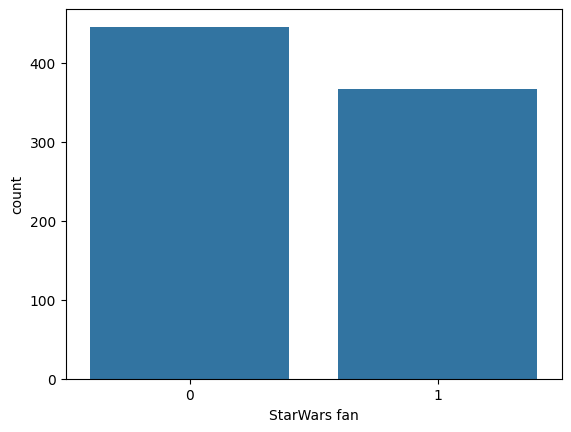

In [33]:
sns.countplot(x='StarWars fan', data=dataset)
plt.show()

### Optioneel: vanaf hier start de voorbeeld code van AI, enkel indien je de dataset correct gepreprocessed hebt zou de code perfect moeten werken.
Het kan wel zijn dat je nog sklearn moet installeren, dit kan je doen door in je command line het volgende te typen:  
`pip install -U scikit-learn`  
(zie documentatie indien je anaconda gebruikt: https://scikit-learn.org/stable/install.html)

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

De dataset wordt opgesplits in target (je te voorspellen waarde) en features  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [35]:
# # De dataset wordt opgesplits in target(je te voorspellen waarde) en features
y = dataset['StarWars fan'].values
X = dataset.drop('StarWars fan',axis=1)

Dataset wordt opgesplitst in een training set en een test set, training set wordt gebruikt om model te trainen en test set wordt gebruik om te valideren hoe goed je model werkt.

In [36]:
# Opsplitsen in een training set en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=0)

In [37]:
# # Heel eenvoudig model die voorspellingen doet
logreg = linear_model.LogisticRegression(C=1,solver='liblinear',class_weight='balanced',penalty='l1')
logreg.fit(X_train, y_train)

# # testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print('Accuracy: {}%'.format(accuracy_score(y_test,y_pred)*100))
print('Matrix:\n', confusion_matrix(y_test,y_pred))


Accuracy: 86.0%
Matrix:
 [[88 16]
 [12 84]]


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# # Trainen en testen van een random forest tree classifier
number_of_trees = 100
max_number_of_features = 6

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

RFCmodel.fit(X_train,y_train)

# # Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

[[88 16]
 [11 85]]
86.5
